In [21]:
#Part IV : Model Evaluating
from PIL import Image
import numpy as np
from keras.models import load_model

MODEL_PATH='vgg16.h5'
IMG_PATH= 'cat2.jpg'

d= {0:'airplane',
   1:'automobile',
   2:'bird',
   3:'deer',
   4:'cat',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'}

In [2]:
##
model =load_model(MODEL_PATH)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cifar10_input (InputLayer)   (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________

/usr/lib64/python2.7/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


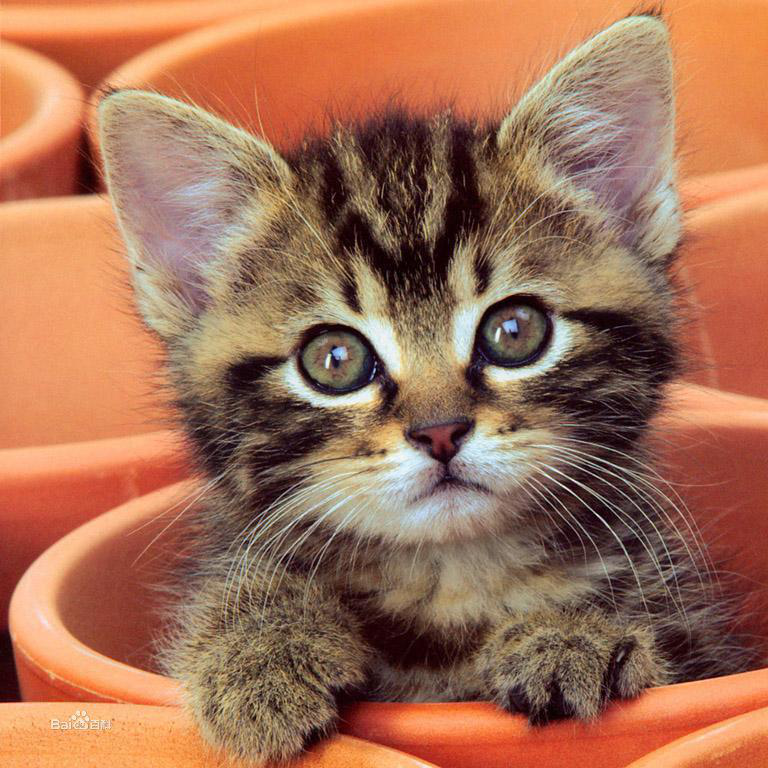

In [22]:
##
img=Image.open(IMG_PATH)
img

In [23]:
##
img = img.resize((32, 32))  
##
data=np.array(img)
##
data=data.reshape(1,32,32,3)
result=model.predict(data)

In [35]:
img=Image.open(IMG_PATH)
##
img = img.resize((32, 32))  
##
data=np.array(img)
##
data=data.reshape(1,32,32,3)
result=model.predict(data)

print 'Prediction:', result
print (result.round(0))
result=np.where(result[0]==1)
print result[0].tolist()[0]
##result=result[0].tolist()[0]
##print (('>>> the predict result is : {}').format(d[result]))

Prediction: [[2.7170932e-11 4.2654314e-08 1.5688153e-07 1.1912584e-05 6.0157932e-09
  9.8436644e-08 9.9998784e-01 1.4600203e-10 6.6781359e-12 5.8337577e-08]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


IndexError: list index out of range

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen=ImageDataGenerator(rotation_range = 0.2,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

img = load_img(r'./cat.jpg')
x = img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
for batch in datagen.flow(x,
                         batch_size=1,
                         save_to_dir=r'./result/',
                         save_prefix='cat',
                         save_format='jpg'
                         ):
    i += 1
    if i> 20 : break

In [2]:
##
import keras
from keras.models import load_model
from keras.datasets import cifar10

MODEL_PATH='vgg16.h5'
NUM_CLASSES = 10

((x_train, y_train), (x_test, y_test)) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

Using TensorFlow backend.


In [38]:
x_test.shape

(10000, 32, 32, 3)

In [39]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [3]:
##
model =load_model(MODEL_PATH)
scores = model.evaluate(x_test, y_test, verbose=1)
##
print(('valid loss:{}, valid accuracy:{}').format(scores[0], scores[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/lib64/python2.7/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


10000/10000 [==============================] - 314s 31ms/step
valid loss:1.27469765482, valid accuracy:0.7148
